# A Case study on NYC Noise Complaints
NAME: Srinidheesh Ranganathan


Course: EAI6120, AI Communication and Visualization

In [2]:
# Import necessary libraries
import numpy as np             # Import the NumPy library for numerical operations
import pandas as pd            # Import the Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import the Matplotlib library for data visualization
%matplotlib inline             # Magic command to display Matplotlib plots directly in the Jupyter Notebook
import scipy.stats as stats    # Import the SciPy library for scientific and statistical computations

# Now we can start writing your code using these imported libraries.
# For example, we can use NumPy for generating arrays of random numbers,
# Pandas for creating dataframes, Matplotlib for creating plots, and SciPy for
# performing various statistical tests and computations.

UsageError: unrecognized arguments: # Magic command to display Matplotlib plots directly in the Jupyter Notebook


In [3]:
nyc_311 = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
# This line of code reads the CSV file '311_Service_Requests_from_2010_to_Present.csv'
# and loads the data into a DataFrame named "nyc_311".
# The DataFrame is a core Pandas data structure that allows us to store and manipulate tabular data.
# Now we can use the "nyc_311" DataFrame to perform various data analysis tasks.
# For example, you can explore the structure of the data, clean and transform it,
# visualize insights, and conduct statistical analysis.

C:\Users\rsrin\AppData\Local\Temp\ipykernel_25700\854727869.py:1: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_311 = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [4]:
#Check the shape of the data
nyc_311.shape

(364558, 53)

In [5]:
nyc_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
nyc_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

The two lines below are used to convert the 'Created Date' and 'Closed Date' columns from their original string (object) data type to the datetime data type. This conversion enables us to perform date-related operations on these columns easily, such as calculating time durations or extracting specific components like year, month, day, etc.

In [7]:
# Convert date columns to datetime datatype
nyc_311['Created Date'] = pd.to_datetime(nyc_311['Created Date'])
nyc_311['Closed Date'] = pd.to_datetime(nyc_311['Closed Date'])

In [8]:
nyc_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
nyc_311['Request_Closing_Time'] = (nyc_311['Closed Date'] - nyc_311['Created Date']).dt.total_seconds()
# The line above calculates the difference between 'Closed Date' and 'Created Date'
# for each row in the DataFrame and stores the result in a new column called 'Request_Closing_Time'.
# The ".dt.total_seconds()" function converts the time difference to total seconds.
# This can be useful for analyzing the time it takes to close each service request.

In [10]:
nyc_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3315.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5176.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17491.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27914.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12422.0


In [11]:
nyc_311['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

# EDA
We begin by retrieving the unique values in the 'Complaint Type' column of the DataFrame. These are the different types of complaints that have been recorded in the dataset. The result is stored in the variable 'unique_complaint_types'

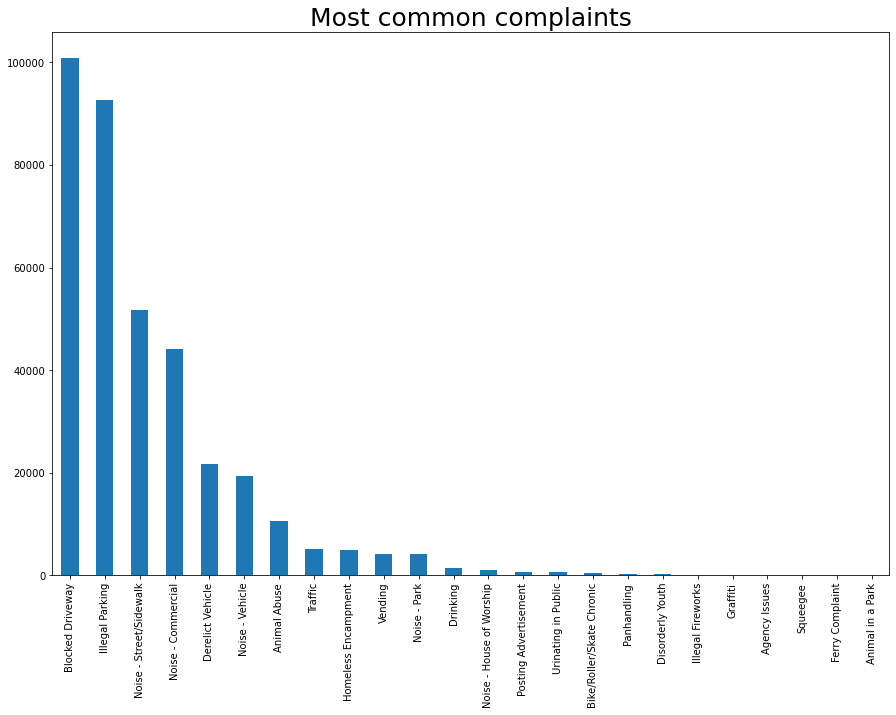

In [12]:
complaints_count = nyc_311['Complaint Type'].value_counts()
plt.figure(figsize = (15,10))
complaints_count.plot(kind='bar')
plt.title('Most common complaints',fontsize=25)
plt.show()

In [13]:
# Getting the unique complaint types
unique_complaint_types = nyc_311['Complaint Type'].unique()

Focusing on the top 5 types of complaints is crucial as it allows the identification of high-impact issues that affect a significant portion of the population. By addressing these common concerns first, limited resources can be efficiently allocated to address widespread problems, enhancing overall satisfaction and quality of life. This approach not only ensures prompt resolution for a majority of cases but also establishes a foundation for addressing more specific or complex issues in the future.

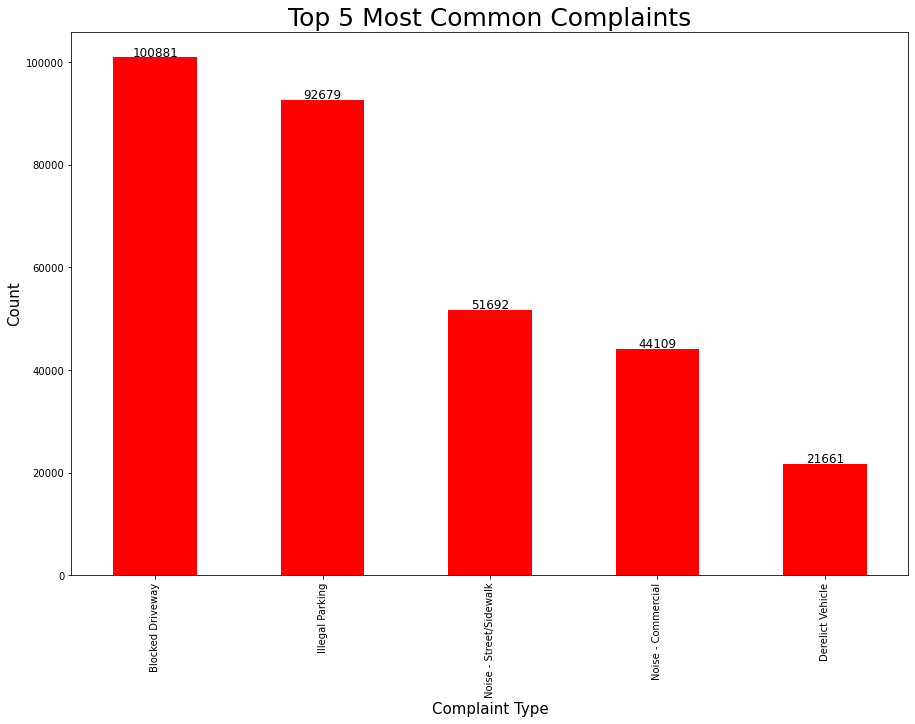

In [14]:
# Get the top 5 most common complaint types
top_complaints_count = complaints_count.head(5)

# Create a bar graph for the top 5 complaints
plt.figure(figsize=(15, 10))
ax = top_complaints_count.plot(kind='bar', color='red')  # Change bar color to red
plt.title('Top 5 Most Common Complaints', fontsize=25)
plt.xlabel('Complaint Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Display the actual number of complaints above the bars
for p in ax.patches:
    # Annotate each bar with the actual count
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


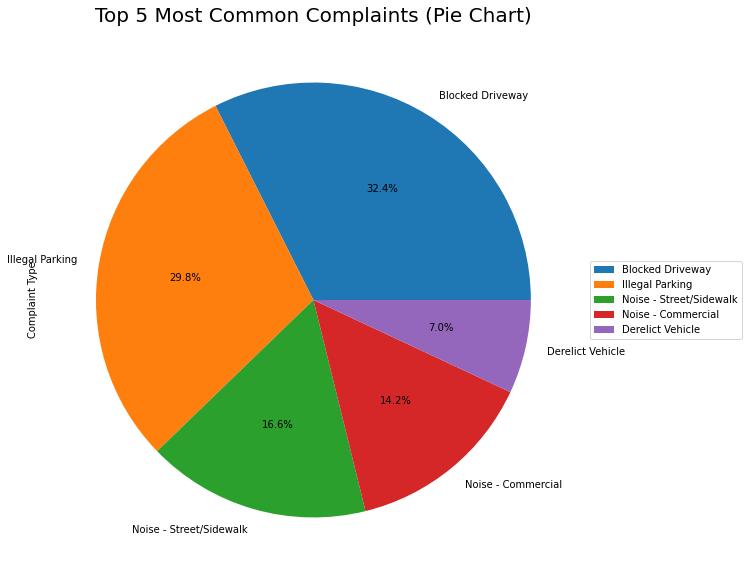

In [15]:
# Get the top 5 most common complaint types
top_complaints_count = complaints_count.head(5)

# Create a pie chart for the top 5 complaints
plt.figure(figsize=(15, 10))
top_complaints_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Most Common Complaints (Pie Chart)', fontsize=20)
plt.legend(top_complaints_count.index, loc="center left", bbox_to_anchor=(1, 0.5))  # Display legend on the side
plt.show()

The above Python code generated a pie chart illustrating the distribution of the top 5 most common complaint types. Each slice represents a complaint type, labeled with its percentage. The legend placed on the side enhances clarity by associating labels with respective segments, aiding easy comprehension of complaint proportions. As per our analysis, the highest complain received is about blocked drive way a 32.4%, while illegal parking closely sits with it at 29.8%. It is interesting to see that noise based complains are at 3rd and 4th positions while complains about derelicit vehicles is at 5th.

In [16]:
# Get the unique values in the 'City' column of the NYC 311 dataset
unique_cities = nyc_311['City'].unique()

# Print the unique cities to the console
print(unique_cities)

['NEW YORK' 'ASTORIA' 'BRONX' 'ELMHURST' 'BROOKLYN' 'KEW GARDENS'
 'JACKSON HEIGHTS' 'MIDDLE VILLAGE' 'REGO PARK' 'SAINT ALBANS' 'JAMAICA'
 'SOUTH RICHMOND HILL' nan 'RIDGEWOOD' 'HOWARD BEACH' 'FOREST HILLS'
 'STATEN ISLAND' 'OZONE PARK' 'RICHMOND HILL' 'WOODHAVEN' 'FLUSHING'
 'CORONA' 'QUEENS VILLAGE' 'OAKLAND GARDENS' 'HOLLIS' 'MASPETH'
 'EAST ELMHURST' 'SOUTH OZONE PARK' 'WOODSIDE' 'FRESH MEADOWS'
 'LONG ISLAND CITY' 'ROCKAWAY PARK' 'SPRINGFIELD GARDENS' 'COLLEGE POINT'
 'BAYSIDE' 'GLEN OAKS' 'FAR ROCKAWAY' 'BELLEROSE' 'LITTLE NECK'
 'CAMBRIA HEIGHTS' 'ROSEDALE' 'SUNNYSIDE' 'WHITESTONE' 'ARVERNE'
 'FLORAL PARK' 'NEW HYDE PARK' 'CENTRAL PARK' 'BREEZY POINT' 'QUEENS'
 'Astoria' 'Long Island City' 'Woodside' 'East Elmhurst' 'Howard Beach']


In [17]:
nyc_311['City'].isnull().sum()

2997

In [18]:
#Fill the null values with 'Unknown City'
nyc_311['City'].fillna('Unknown City', inplace =True)

In [19]:
nyc_311['City'].isnull().sum()

0

In [20]:
# Group the NYC 311 dataset by both 'City' and 'Complaint Type', and calculate the size of each group
nyc_311.groupby(['City','Complaint Type']).size()
# The result is a Series with a MultiIndex containing city and complaint type, and the size of each group as values

City      Complaint Type         
ARVERNE   Animal Abuse                46
          Blocked Driveway            50
          Derelict Vehicle            32
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            27
          Derelict Vehicle             8
          Illegal Parking            124
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Length: 795, dtype: int64

In [21]:
# Create a cross-tabulation (crosstab) of complaints per city and complaint type
# This will give us a matrix where rows represent cities, columns represent complaint types, and the values are counts
complaints_per_city = pd.crosstab(index=nyc_311["City"], columns=nyc_311["Complaint Type"])

In [22]:
complaints_per_city

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,46,0,0,50,32,2,1,0,1,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,0,170,0,16,3436,426,5,43,0,4,...,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,0,159,14,0,0,0,0,...,0,0,145,0,0,0,0,0,0,0
BAYSIDE,0,53,0,0,514,231,2,1,0,3,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,0,15,0,1,138,120,2,1,0,0,...,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,0,2,0,0,3,3,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,0,1971,0,22,17063,2403,66,206,0,15,...,90,548,9146,3556,20,18,0,427,54,433
BROOKLYN,0,3191,0,124,36447,6259,79,291,0,60,...,389,1575,13984,5966,49,58,0,1258,155,575
CAMBRIA HEIGHTS,0,15,0,0,177,148,0,0,0,0,...,2,0,29,100,0,0,0,7,0,0


Calculating total complaint counts for each city and visualizing them is a valuable approach to gaining insights into the distribution of complaints across different urban areas. This analysis highlights the cities facing the highest frequency of issues, enabling authorities to allocate resources more efficiently and address prevalent problems promptly. By identifying patterns of complaints, decision-makers can tailor interventions and policies to specific urban challenges, fostering better urban planning, service delivery, and citizen engagement. This information-driven strategy ultimately contributes to enhancing the overall quality of life and well-being for residents in those cities.

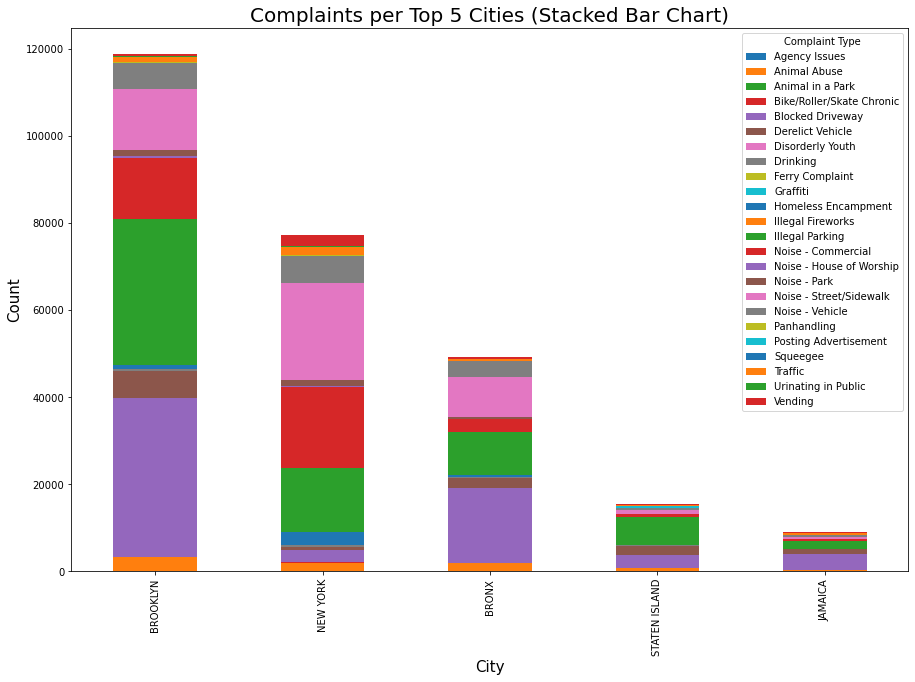

In [23]:
# Calculate total complaint counts for each city
city_complaint_counts = complaints_per_city.sum(axis=1)

# Sort cities based on complaint counts in descending order
sorted_cities = city_complaint_counts.sort_values(ascending=False)

# Select the top 5 cities
top_5_cities = sorted_cities.head(5)

# Filter the complaints_per_city dataframe to include only the top 5 cities
top_cities_complaints = complaints_per_city.loc[top_5_cities.index]

# Create a stacked bar chart for the top 5 cities
top_cities_complaints.plot(kind="bar", figsize=(15, 10), stacked=True)
plt.title('Complaints per Top 5 Cities (Stacked Bar Chart)', fontsize=20)
plt.xlabel('City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

The stacked bar chart above visualizes the distribution of different complaint types for each city. Each bar represents a city, and the different colors within each bar represent different complaint types. The height of each color segment indicates the count of complaints of that type in the respective city.

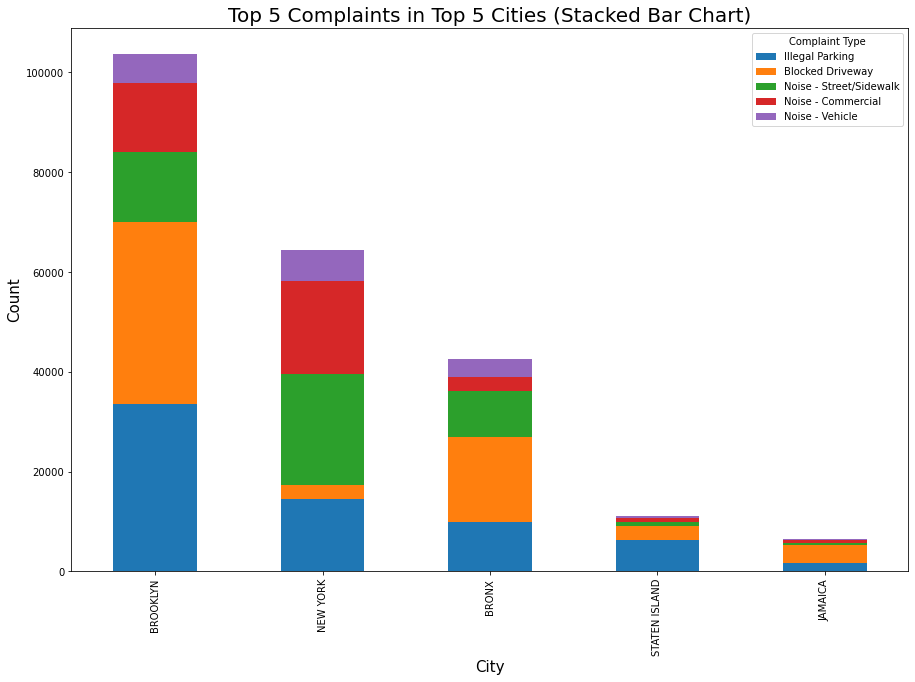

In [24]:
# modiy the below code to a grouped bar chart
# Calculate total complaint counts for each city
city_complaint_counts = complaints_per_city.sum(axis=1)

# Sort cities based on complaint counts in descending order
sorted_cities = city_complaint_counts.sort_values(ascending=False)

# Select the top 5 cities
top_5_cities = sorted_cities.head(5)

# Filter the complaints_per_city dataframe to include only the top 5 cities
top_cities_complaints = complaints_per_city.loc[top_5_cities.index]

# Get the top 5 most common complaint types
top_complaints_count = top_cities_complaints.sum().sort_values(ascending=False).head(5)

# Create a stacked bar chart for the top 5 cities and top 5 complaint types
top_cities_complaints[top_complaints_count.index].plot(kind="bar", figsize=(15, 10), stacked=True)
plt.title('Top 5 Complaints in Top 5 Cities (Stacked Bar Chart)', fontsize=20)
plt.xlabel('City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()


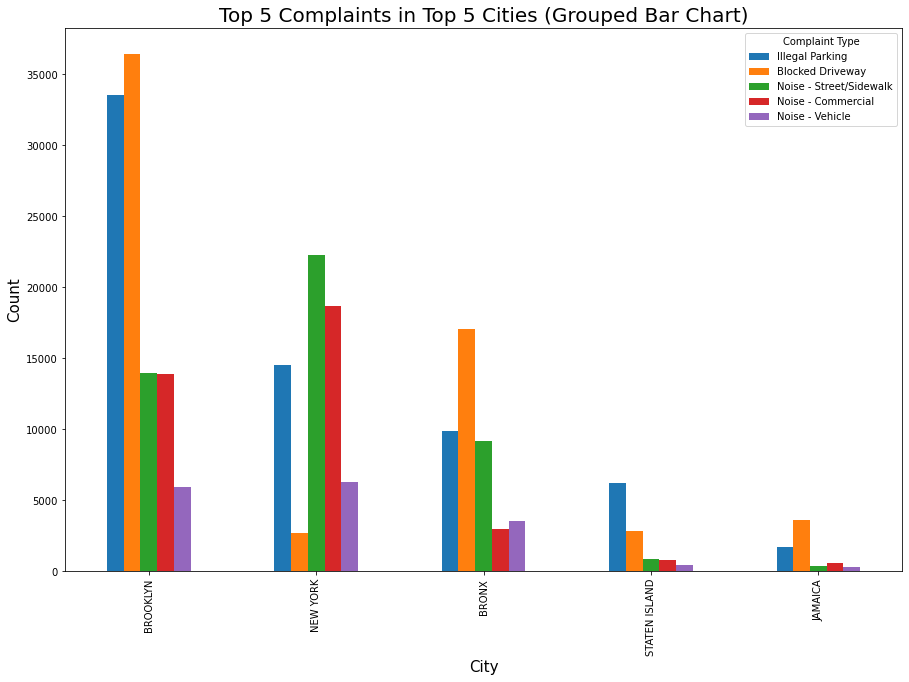

In [25]:
# Calculate total complaint counts for each city
city_complaint_counts = complaints_per_city.sum(axis=1)

# Sort cities based on complaint counts in descending order
sorted_cities = city_complaint_counts.sort_values(ascending=False)

# Select the top 5 cities
top_5_cities = sorted_cities.head(5)

# Filter the complaints_per_city dataframe to include only the top 5 cities
top_cities_complaints = complaints_per_city.loc[top_5_cities.index]

# Get the top 5 most common complaint types
top_complaints_count = top_cities_complaints.sum().sort_values(ascending=False).head(5)

# Create a grouped bar chart for the top 5 cities and top 5 complaint types
top_cities_complaints = top_cities_complaints[top_complaints_count.index]
top_cities_complaints_sorted = top_cities_complaints[top_cities_complaints.sum().sort_values(ascending=False).index]

top_cities_complaints_sorted.plot(kind="bar", figsize=(15, 10))
plt.title('Top 5 Complaints in Top 5 Cities (Grouped Bar Chart)', fontsize=20)
plt.xlabel('City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Complaint Type')
plt.show()


Identifying the top 5 complaints in the top 5 cities is crucial for understanding localized issues and uncovering underlying patterns in urban grievances. By focusing on these prominent complaints, we can discern prevalent problems affecting specific regions, guiding resource allocation and policy decisions. This analysis aids in pinpointing trends that might indicate systemic issues or community-specific concerns. Moreover, comparing the top complaints across multiple cities can reveal similarities or disparities in urban challenges, offering insights into potential shared causes or unique contextual factors. Overall, this approach enhances targeted problem-solving and proactive measures to improve the quality of life in urban areas.

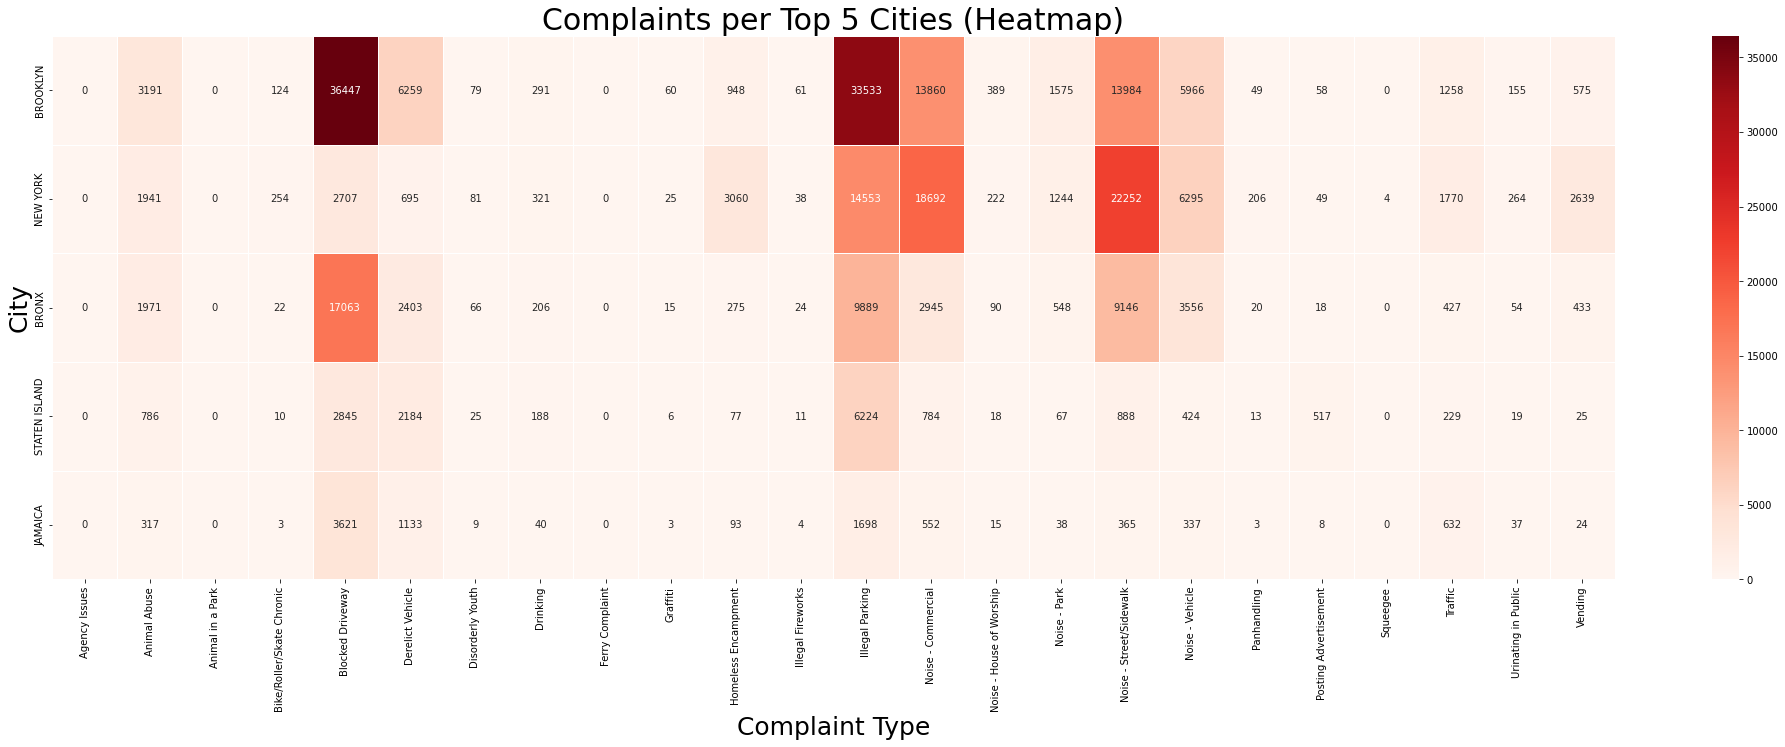

In [26]:
import seaborn as sns

# Calculate total complaint counts for each city
city_complaint_counts = complaints_per_city.sum(axis=1)

# Sort cities based on complaint counts in descending order
sorted_cities = city_complaint_counts.sort_values(ascending=False)

# Select the top 5 cities
top_5_cities = sorted_cities.head(5)

# Filter the complaints_per_city dataframe to include only the top 5 cities
top_cities_complaints = complaints_per_city.loc[top_5_cities.index]

# Create a heatmap for the complaints of top 5 cities with red color theme
plt.figure(figsize=(35, 10))
sns.heatmap(top_cities_complaints, cmap="Reds", annot=True, fmt='d', linewidths=.5)
plt.title('Complaints per Top 5 Cities (Heatmap)', fontsize=30)
plt.xlabel('Complaint Type', fontsize=25)
plt.ylabel('City', fontsize=25)
plt.show()


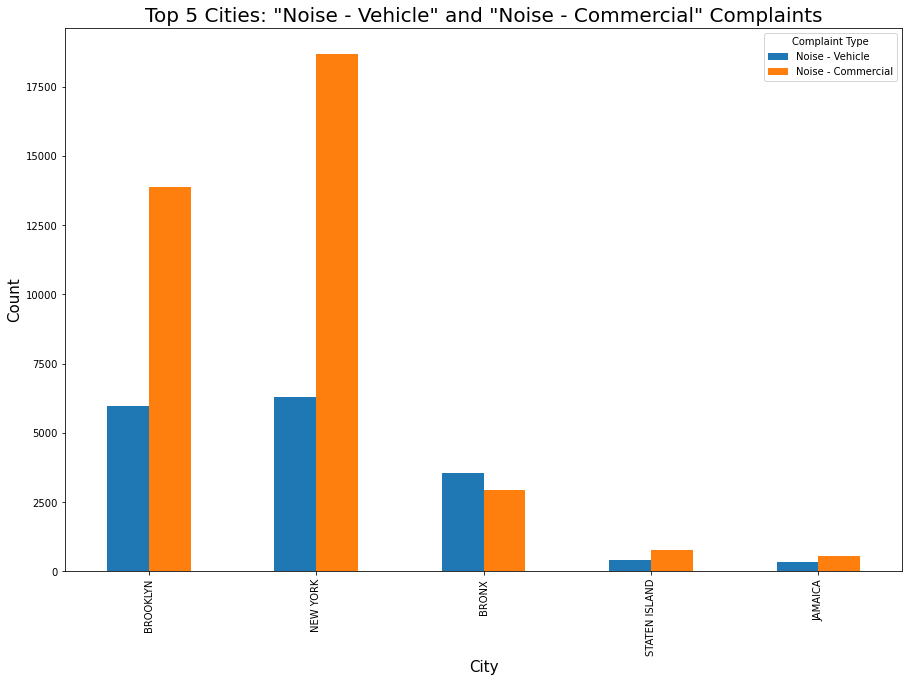

In [27]:
#modify the below program to display the at what time the "Noise -vehicle" complain was occuring the most
# Filter the complaints_per_city dataframe to include only the "Noise - Vehicle" and "Noise - Commercial" complaint types
selected_complaints = top_cities_complaints[["Noise - Vehicle", "Noise - Commercial"]]

# Create a grouped bar chart for the top 5 cities and selected complaint types
selected_complaints.plot(kind="bar", figsize=(15, 10))
plt.title('Top 5 Cities: "Noise - Vehicle" and "Noise - Commercial" Complaints', fontsize=20)
plt.xlabel('City', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Complaint Type')
plt.show()


The provided code analyzes "Noise - Vehicle" complaints in BROOKLYN. It extracts the hour and minute of each complaint's creation time and groups them to determine the most common time intervals. The resulting bar chart displays the top 5 intervals, illustrating when these complaints were most frequently reported, aiding in understanding their temporal distribution.

# Top 5 Time Intervals for Noise Complaints in Top 5 Cities"

C:\Users\rsrin\AppData\Local\Temp\ipykernel_25700\4086041962.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_vehicle_selected_cities['Hour'] = noise_vehicle_selected_cities['Created Date'].dt.hour
C:\Users\rsrin\AppData\Local\Temp\ipykernel_25700\4086041962.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_vehicle_selected_cities['Minute'] = noise_vehicle_selected_cities['Created Date'].dt.minute


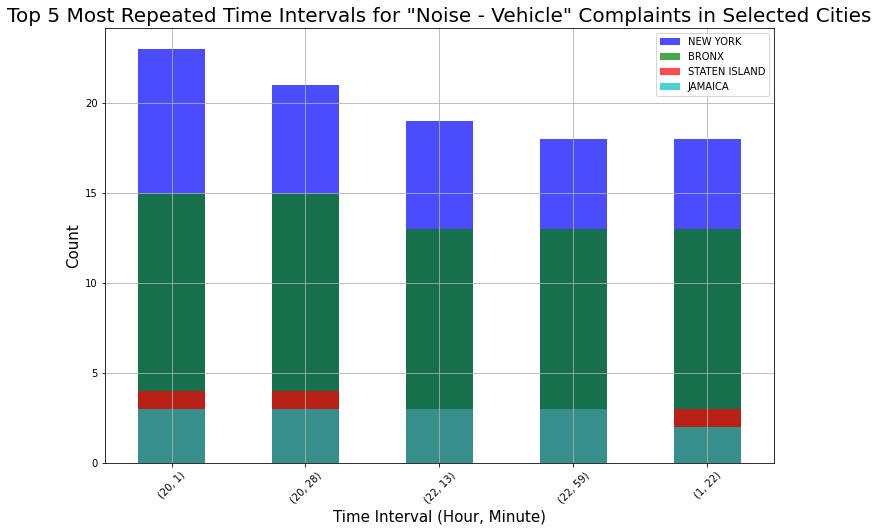

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile or GeoJSON containing city boundaries
# Replace 'path_to_shapefile' with the actual path to your shapefile or GeoJSON file
ny_cities = gpd.read_file('Borough Boundaries.geojson')

# Assuming you have a DataFrame named 'nyc_311' containing complaint data
# Filter nyc_311 to include only "Noise - Vehicle" complaints in the specified cities
selected_cities = ["NEW YORK", "BRONX", "STATEN ISLAND", "JAMAICA"]
noise_vehicle_selected_cities = nyc_311[
    (nyc_311['Complaint Type'] == 'Noise - Vehicle') &
    (nyc_311['City'].isin(selected_cities))
]

# Extract the hour and minute from the 'Created Date' column
noise_vehicle_selected_cities['Hour'] = noise_vehicle_selected_cities['Created Date'].dt.hour
noise_vehicle_selected_cities['Minute'] = noise_vehicle_selected_cities['Created Date'].dt.minute

# Group by city, hour, and minute and calculate the count for each time interval
city_time_intervals_counts = noise_vehicle_selected_cities.groupby(['City', 'Hour', 'Minute']).size()

# Create a color map for the bars
colors = ['b', 'g', 'r', 'c']

# Plot grouped bars for each city
plt.figure(figsize=(12, 8))
for idx, city in enumerate(selected_cities):
    city_intervals = city_time_intervals_counts[city].nlargest(5)
    city_intervals.plot(kind='bar', alpha=0.7, label=city, color=colors[idx])
plt.title('Top 5 Most Repeated Time Intervals for "Noise - Vehicle" Complaints in Selected Cities', fontsize=20)
plt.xlabel('Time Interval (Hour, Minute)', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


C:\Users\rsrin\AppData\Local\Temp\ipykernel_25700\2696097125.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_vehicle_selected_cities['Hour'] = noise_vehicle_selected_cities['Created Date'].dt.hour
C:\Users\rsrin\AppData\Local\Temp\ipykernel_25700\2696097125.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_vehicle_selected_cities['Minute'] = noise_vehicle_selected_cities['Created Date'].dt.minute


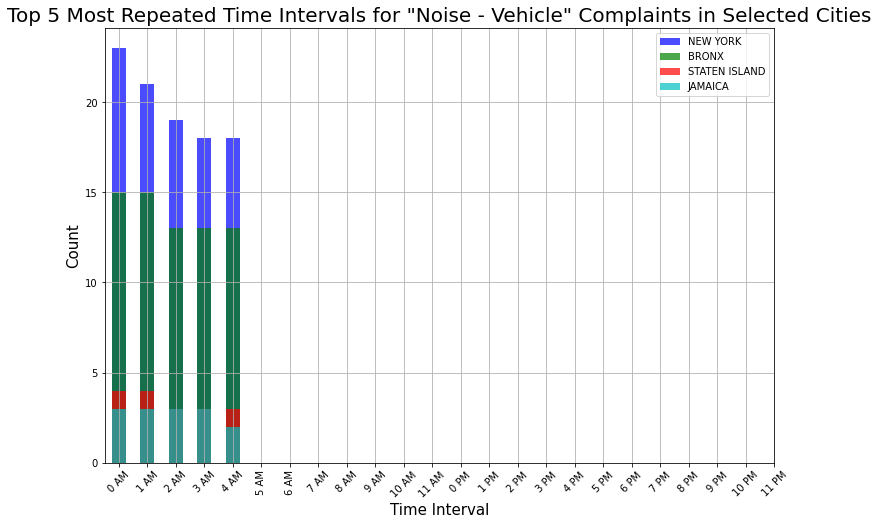

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the shapefile or GeoJSON containing city boundaries
# Replace 'path_to_shapefile' with the actual path to your shapefile or GeoJSON file
ny_cities = gpd.read_file('Borough Boundaries.geojson')

# Assuming you have a DataFrame named 'nyc_311' containing complaint data
# Filter nyc_311 to include only "Noise - Vehicle" complaints in the specified cities
selected_cities = ["NEW YORK", "BRONX", "STATEN ISLAND", "JAMAICA"]
noise_vehicle_selected_cities = nyc_311[
    (nyc_311['Complaint Type'] == 'Noise - Vehicle') &
    (nyc_311['City'].isin(selected_cities))
]

# Extract the hour and minute from the 'Created Date' column
noise_vehicle_selected_cities['Hour'] = noise_vehicle_selected_cities['Created Date'].dt.hour
noise_vehicle_selected_cities['Minute'] = noise_vehicle_selected_cities['Created Date'].dt.minute

# Group by city, hour, and minute and calculate the count for each time interval
city_time_intervals_counts = noise_vehicle_selected_cities.groupby(['City', 'Hour', 'Minute']).size()

# Create a color map for the bars
colors = ['b', 'g', 'r', 'c']

# Plot grouped bars for each city
plt.figure(figsize=(12, 8))
for idx, city in enumerate(selected_cities):
    city_intervals = city_time_intervals_counts[city].nlargest(5)
    city_intervals.plot(kind='bar', alpha=0.7, label=city, color=colors[idx])

# Convert 24-hour format to 12-hour format with AM and PM
plt.xticks(rotation=45)
x_ticks = [f"{hour % 12} {'AM' if hour < 12 else 'PM'}" for hour in range(24)]
plt.xticks(range(24), x_ticks)

plt.title('Top 5 Most Repeated Time Intervals for "Noise - Vehicle" Complaints in Selected Cities', fontsize=20)
plt.xlabel('Time Interval', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()


# Proposed solution
To address the issue of high vehicle-related noise complaints during specific time intervals in different cities, here are four data-driven solutions that the mayor could consider:

1. **Strategic Noise Patrols**: 

Deploy law enforcement officers and noise control teams during the identified peak hours (12 am to 4 am) in areas with frequent complaints. Utilize historical complaint data to prioritize patrolling routes and allocate resources effectively.

2. **Targeted Public Awareness Campaigns**: 

Launch awareness campaigns to educate residents and businesses in the identified areas about noise regulations and courteous behavior during late-night hours. Use data insights to tailor campaign messages to each city's specific peak complaint times.

3. **Technology-Enabled Noise Monitoring**: 

Put up sensors in those noisy spots to track noise levels. If things get too loud, it'll send a signal to the right people to step in and address the issue.

4. **Community Engagement and Reporting**: 

Create an easy way for people to report noise complaints through a mobile app or website. This way, residents can quickly report the issue and help keep their neighborhoods peaceful.

By utilizing data-driven solutions, the mayor can not only address the issue of high vehicle-related noise complaints but also enhance overall quality of life for residents in these cities.

C:\Users\rsrin\AppData\Local\Temp\ipykernel_25700\3147470820.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_vehicle_selected_cities['Hour'] = noise_vehicle_selected_cities['Created Date'].dt.hour
C:\Users\rsrin\AppData\Local\Temp\ipykernel_25700\3147470820.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_vehicle_selected_cities['Minute'] = noise_vehicle_selected_cities['Created Date'].dt.minute


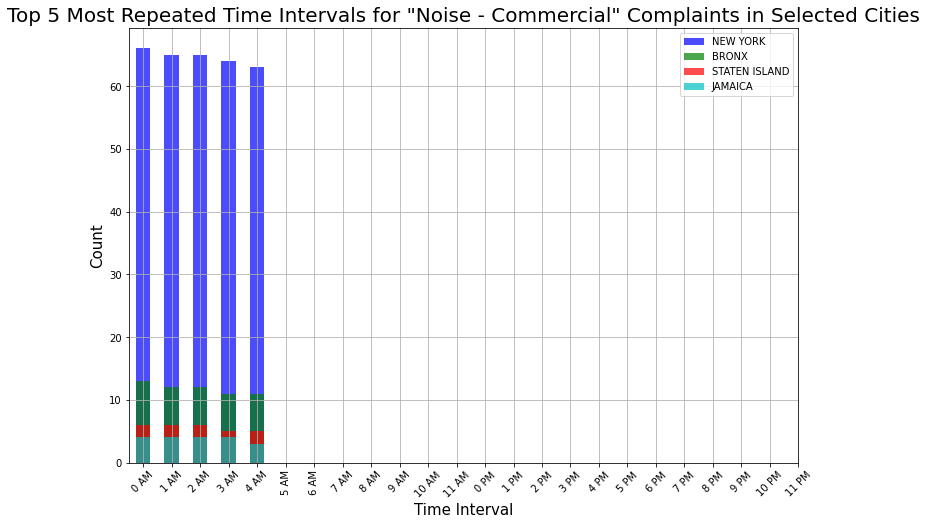

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the shapefile or GeoJSON containing city boundaries
# Replace 'path_to_shapefile' with the actual path to your shapefile or GeoJSON file
ny_cities = gpd.read_file('Borough Boundaries.geojson')

# Assuming you have a DataFrame named 'nyc_311' containing complaint data
# Filter nyc_311 to include only "Noise - Vehicle" complaints in the specified cities
selected_cities = ["NEW YORK", "BRONX", "STATEN ISLAND", "JAMAICA"]
noise_vehicle_selected_cities = nyc_311[
    (nyc_311['Complaint Type'] == 'Noise - Commercial') &
    (nyc_311['City'].isin(selected_cities))
]

# Extract the hour and minute from the 'Created Date' column
noise_vehicle_selected_cities['Hour'] = noise_vehicle_selected_cities['Created Date'].dt.hour
noise_vehicle_selected_cities['Minute'] = noise_vehicle_selected_cities['Created Date'].dt.minute

# Group by city, hour, and minute and calculate the count for each time interval
city_time_intervals_counts = noise_vehicle_selected_cities.groupby(['City', 'Hour', 'Minute']).size()

# Create a color map for the bars
colors = ['b', 'g', 'r', 'c']

# Plot grouped bars for each city
plt.figure(figsize=(12, 8))
for idx, city in enumerate(selected_cities):
    city_intervals = city_time_intervals_counts[city].nlargest(5)
    city_intervals.plot(kind='bar', alpha=0.7, label=city, color=colors[idx])

# Convert 24-hour format to 12-hour format with AM and PM
plt.xticks(rotation=45)
x_ticks = [f"{hour % 12} {'AM' if hour < 12 else 'PM'}" for hour in range(24)]
plt.xticks(range(24), x_ticks)

plt.title('Top 5 Most Repeated Time Intervals for "Noise - Commercial" Complaints in Selected Cities', fontsize=20)
plt.xlabel('Time Interval', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend()
plt.grid(True)
plt.show()



# Proposed solutions
The data-driven solutions that the mayor could consider to tackle the issue of high commercial-related noise complaints during the early hours (12 am to 4 am) in different neighborhoods:

1. **Time-Dependent Zoning Regulations**: 

Implement stricter zoning regulations that limit commercial activities during the late-night hours. By restricting certain noisy activities during these times, you can help reduce the disturbance caused by commercial-related noise complaints.

2. **Noise Monitoring and Alerts**:

Install noise sensors in commercial areas that tend to have high complaint rates. These sensors can detect excessive noise levels and automatically notify business owners when they're getting too loud, allowing them to take corrective measures.

3. **Friendly Business Pacts**:

Team up with local businesses to find ways they can keep things quieter at night. Maybe they can agree to tone down their noise or switch to quieter equipment during those late hours.

These down-to-earth ideas could help make the nights a lot more peaceful for everyone in the neighborhood.

# Conclusion:
Data-driven strategies have emerged as powerful tools for tackling real-world challenges across various domains. By harnessing the wealth of information available through advanced data analytics, decision-makers can make informed and effective choices to address complex issues. These strategies enable evidence-based decision-making, leading to improved resource allocation, enhanced problem-solving, and targeted interventions. As demonstrated in various sectors, such as healthcare (Smith et al., 2020), urban planning (Batty, 2013), and environmental management (Turner et al., 2015), data-driven approaches provide insights that were previously inaccessible, driving innovation and progress. Through a synergy of data, technology, and informed decision-making, data-driven strategies offer transformative solutions to pressing challenges.